# EXAMPLE: COUNTING RAINY DAYS

In [1]:
import numpy as np
import pandas as pd

In [2]:
rainfall = pd.read_csv("Seattle2014.csv")["PRCP"].values
inches = rainfall / 254.0 # 1/10mm -> inches
inches.shape

(365,)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

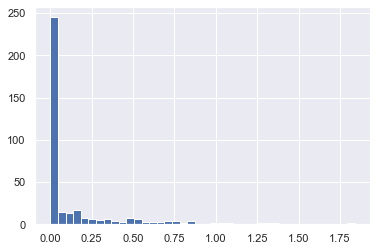

In [4]:
plt.hist(inches, 40)

# COMPARISON OPERATORS AS UFUNCS

In [5]:
x = np.array([1, 2, 3, 4, 5])

In [6]:
x < 3

array([ True,  True, False, False, False])

In [7]:
x > 3

array([False, False, False,  True,  True])

In [8]:
x <= 3

array([ True,  True,  True, False, False])

In [9]:
x >= 3

array([False, False,  True,  True,  True])

In [10]:
x != 3

array([ True,  True, False,  True,  True])

In [11]:
x == 3

array([False, False,  True, False, False])

In [12]:
# it is also possible to do an element-wise comparison of two arrays, and to include compound expressions

(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [13]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [14]:
rng

RandomState(MT19937) at 0x141112C40

In [15]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

# WORKING WITH BOOLEAN ARRAYS

In [16]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


## COUNTING ENTRIES

In [17]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

Another way to get the count of values which are less than 6 is to use np.su, <br>
In this case, *False* is interpreted as 0, and *True* is interpreted as 1

In [18]:
np.sum(x < 6)

8

In [19]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [20]:
# are there any values greater than 8?
np.any(x > 8)

True

In [21]:
# are there any values less than zero?
np.any(x < 0)

False

In [22]:
# are all values less than 10?
np.all(x < 10)

True

In [23]:
# are all values equal to 6?
np.all(x == 6)

False

In [24]:
# np.any and np.all can be used along particular axes as well
np.all(x < 8, axis=1)

array([ True, False,  True])

## BOOLEAN OPERATORS

In [25]:
# parentheses are important
np.sum((inches > 0.5) & (inches < 1))

29

In [26]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [27]:
print("Number of days without rain: ", np.sum(inches == 0))
print("Number of days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches: ", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches: ", np.sum( (inches > 0) & (inches < 0.2) ))

Number of days without rain:  215
Number of days with rain:  150
Days with more than 0.5 inches:  37
Rainy days with < 0.2 inches:  75


# BOOLEAN ARRAYS AS MASKS

In [28]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [29]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [30]:
# select the values less than 5
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [33]:
# construct a mask of all rainy days
rainy_days_mask = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(1, 366)
summer = (days > 172) & (days < 262)

print("Median precipitation on summer days in 2014 (inches): ",
    np.median(inches[rainy_days_mask]))
print("Median precipitation on summer days in 2014 (inches): ",
    np.median(inches[summer]))
print("Maximum precipitation on summer days in 2014 (inches): ",
    np.max(inches[summer]))
print("Maximum precipitation on non-summer days in 2014 (inches): ",
    np.median(inches[rainy_days_mask & (~summer)]))

Median precipitation on summer days in 2014 (inches):  0.19488188976377951
Median precipitation on summer days in 2014 (inches):  0.0
Maximum precipitation on summer days in 2014 (inches):  0.8503937007874016
Maximum precipitation on non-summer days in 2014 (inches):  0.20078740157480315


we can combine Boolean operations, masking operations, and aggregates

# USING KEYWORDS AND/OR VERSUS THE OPERATORS &/|

"and" and "or" gauge the truth or falsehood of *entire object*<br>
while "&" and "|" refer to *bits within each object*